In [ ]:
import numpy as np
import pandas as pd
from itertools import product
from SimuInf.random_field_generator import gen_spec, gen_2D
from SimuInf.scb import confband
from SimuInf.confset import confset
from SimuInf.plotting import ls_plot, confset_plot
from SimuInf.simulation import scb_cover_rate_multiple

### Introduction
This Jupyter notebook demonstrates the usage of the Python package `SimuInf` to obtain **Simultaneous Confidence Regions (SCRs)** for image excursion sets.


### Example Usage
We begin by simulating a sample of two-dimensional random fields with ellipse-shaped signals and computing the SCRs for the excursion sets at thresholds of 2 and 3. A key advantage of SCRs is that they provide valid inference simultaneously across all activation thresholds, allowing you to explore all possible thresholds!

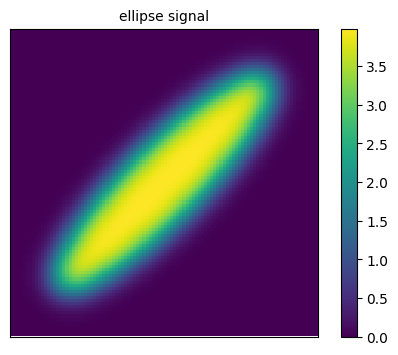

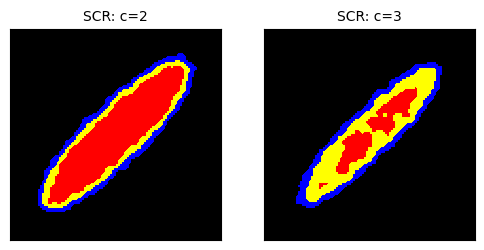

In [ ]:
# simulate a sample of 2D random fields with ellipse-shaped signals
spec_50, spec_100 = gen_spec(fwhm_sig=10, fwhm_noise=4, std=1, mag=4, r=0.5)
data, mu = gen_2D((40,100,100), shape='ellipse', shape_spec=spec_100[1])
# plot the ellipse-shaped signal
ls_plot([mu], name_ls = ['ellipse signal'], nrow=1, figsize=(6,4), fontsize = 10, colorbar = 'individual', colorbar_location = 'right', ticks = False)

# compute the confidence band 
confband1 = confband(np.moveaxis(data, 0,-1), m_boots=100)
# compute the confidence regions (also called confidence sets) using thresholds of 2 and 3
confset1 = confset(*confband1, threshold=2)
confset2 = confset(*confband1, threshold=3)
# plot the results
# the red region, union of red and yellow region, union of red and yellow and blue region represent the inner set, estimated set, outer set, respectively.
confset_plot([confset1, confset2], name_ls = ['SCR: c=2', 'SCR: c=3'], nrow = 1,
             figsize=(6,8), fontsize=10, ticks = False)

### Simulations to Evaluate the Performance of Various Bootstrap Methods
Next, we illustrate how we assessed the performance of different bootstrap methods in constructing **Simultaneous Confidence Bands (SCBs)**.  
In the paper, we varied several parameters — including signal shape, noise distribution, full width at half maximum (FWHM), post-smoothing noise standard deviation, image size, and sample size — resulting in a total of 640 combinations.  
For demonstration purposes, we focus on a few representative settings using our recommended bootstrap approach: the **Rademacher multiplier-t** method.

In [ ]:
# create various simulation settings
n_ls = [20, 40, 60]
# note the actual fwhm_noise used is half its input value
fwhm_ls = [4]
shape_ls = ['ellipse']
noise_type_ls = ['gaussian','t', 'chisq']
# use None for default values of noise_df, which is 3 for a t distribution and 5 for a chisq distribution 
noise_df_ls = [None]
# simulate settings with 100*100 images and SD of 10
setting_df = pd.DataFrame(product(n_ls, [100],[100],fwhm_ls, shape_ls, [10], noise_type_ls, noise_df_ls), 
                          columns=['n', 'w', 'h', 'fwhm_noise', 'shape', 'std', 'noise_type', 'noise_df'])
print(setting_df)
# for illustration, use Rademacher multiplier-t, in the paper, we evaluated 6 bootstrap variants
method_df = pd.DataFrame(product(['res'], ['multiplier'], ['t'], ['r']), columns=['boot_data_type', 'boot_type', 'standardize', 'multiplier'])
print(method_df)



    n    w    h  fwhm_noise    shape  std noise_type noise_df
0  20  100  100           4  ellipse   10   gaussian     None
1  20  100  100           4  ellipse   10          t     None
2  20  100  100           4  ellipse   10      chisq     None
3  40  100  100           4  ellipse   10   gaussian     None
4  40  100  100           4  ellipse   10          t     None
5  40  100  100           4  ellipse   10      chisq     None
6  60  100  100           4  ellipse   10   gaussian     None
7  60  100  100           4  ellipse   10          t     None
8  60  100  100           4  ellipse   10      chisq     None
  boot_data_type   boot_type standardize multiplier
0            res  multiplier           t          r


In [ ]:
# here use a smaller m_sim and m_boots for illustration, in the paper, m_sim = 1000, m_boots = 1000
# this command takes about 2 mins to complete on a standard laptop
simu_df = scb_cover_rate_multiple(setting_df, method_df, 
                      m_sim=100, alpha=0.05,
                      m_boots=100)

print(simu_df)

----performing simulation, current setting number: 1, remaining settings: 8----
----performing simulation, current setting number: 2, remaining settings: 7----
----performing simulation, current setting number: 3, remaining settings: 6----
----performing simulation, current setting number: 4, remaining settings: 5----
----performing simulation, current setting number: 5, remaining settings: 4----
----performing simulation, current setting number: 6, remaining settings: 3----
----performing simulation, current setting number: 7, remaining settings: 2----
----performing simulation, current setting number: 8, remaining settings: 1----
----performing simulation, current setting number: 9, remaining settings: 0----
   rate    mean_q      sd_q  runtime_secs  sd_runtime_secs boot_data_type  \
0  0.94  6.191212  0.214103      0.051484         0.008276            res   
1  0.92  5.894471  0.187495      0.042347         0.005092            res   
2  0.77  6.206921  0.219449      0.083950        